In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import folium
import requests
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "text.usetex" : True,
    "font.family" : "serif",
    "font.serif" : ["Computer Modern Serif"]
}
sns.set_theme(style="ticks", rc=custom_params)

In [62]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))

Python 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0] on linux


In [4]:
df = pd.read_csv("./data/rumor_data.csv", index_col=0)

In [5]:
df.head()

,date,source,content,province,user_0,user_1,user_2,user_3,user_4,user_5,...,user_9,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,like
0,2022-02-18,北京日报客户端,有人从香港游泳偷渡到深圳湾被捕？假的！系轻生被救！,广东,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-02-18,大河报、羊城晚报,近日，社交媒体上一则题为“河南一位老爷爷考上清华大学被顶替”的消息引发网友关注和转发。消息...,河南,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,41
2,2022-02-17,南方都市报、大众网,近日，网传湖南衡阳“南岳衡山寺庙”高薪招聘住持，月薪高达5万元，弹性工作制，下班后原则上不...,湖南,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,26
3,2022-02-17,江苏省互联网举报中心,近日，网传消息称“苏州市独墅湖医院正在建方舱”。该消息发布后，引发关注讨论。 经核实，网传...,江苏,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
4,2022-02-16,中国新闻网,在塞企业组织包机载客回国？中国驻塞内加尔使馆辟谣！,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 365
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      366 non-null    object
 1   source    360 non-null    object
 2   content   366 non-null    object
 3   province  277 non-null    object
 4   user_0    366 non-null    int64 
 5   user_1    366 non-null    int64 
 6   user_2    366 non-null    int64 
 7   user_3    366 non-null    int64 
 8   user_4    366 non-null    int64 
 9   user_5    366 non-null    int64 
 10  user_6    366 non-null    int64 
 11  user_7    366 non-null    int64 
 12  user_8    366 non-null    int64 
 13  user_9    366 non-null    int64 
 14  user_10   366 non-null    int64 
 15  user_11   366 non-null    int64 
 16  user_12   366 non-null    int64 
 17  user_13   366 non-null    int64 
 18  user_14   366 non-null    int64 
 19  user_15   366 non-null    int64 
 20  user_16   366 non-null    int64 
 21  user_17   366 non-nul

In [9]:
df.describe()

,date,user_0,user_1,user_2,user_3,user_4,user_5,user_6,user_7,user_8,user_9,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,like
count,366,366.000000,366.000000,366.00000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2021-12-20 22:01:58.032786944,0.040984,0.188525,0.04918,0.030055,0.010929,0.038251,0.046448,0.120219,0.038251,0.038251,0.087432,0.095628,0.027322,0.024590,0.021858,0.095628,0.019126,0.021858,72.590164
min,2021-11-07 00:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-11-30 00:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,2021-12-20 12:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
75%,2022-01-10 00:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.000000
max,2022-02-18 00:00:00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2495.000000
std,NaN,0.198524,0.391666,0.21654,0.170971,0.104111,0.192065,0.210742,0.325662,0.192065,0.192065,0.282853,0.294484,0.163244,0.155084,0.146420,0.294484,0.137154,0.146420,159.193795


In [15]:
from utils import *

In [34]:
df = pd.read_csv('./data/rumor_data_new.csv', index_col=0)
df['date'] = pd.to_datetime(df['date'])
df['log_like'] = np.log(df['like'] + 1)
df['content_token'] = df['content'].apply(lambda x: get_tokens_without_stopwords(jieba.cut(x, cut_all=False), stopwords=get_stopwords()))

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 365
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           366 non-null    datetime64[ns]
 1   source         360 non-null    object        
 2   content        366 non-null    object        
 3   province       309 non-null    object        
 4   user_0         366 non-null    int64         
 5   user_1         366 non-null    int64         
 6   user_2         366 non-null    int64         
 7   user_3         366 non-null    int64         
 8   user_4         366 non-null    int64         
 9   user_5         366 non-null    int64         
 10  user_6         366 non-null    int64         
 11  user_7         366 non-null    int64         
 12  user_8         366 non-null    int64         
 13  user_9         366 non-null    int64         
 14  user_10        366 non-null    int64         
 15  user_11        366 non-null 

In [36]:
df.describe(percentiles=[0.5])

,date,user_0,user_1,user_2,user_3,user_4,user_5,user_6,user_7,user_8,...,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,like,log_like
count,366,366.000000,366.000000,366.00000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2021-12-20 22:01:58.032786944,0.040984,0.188525,0.04918,0.030055,0.010929,0.038251,0.046448,0.120219,0.038251,...,0.087432,0.095628,0.027322,0.024590,0.021858,0.095628,0.019126,0.021858,72.590164,3.675683
min,2021-11-07 00:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021-12-20 12:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,3.555348
max,2022-02-18 00:00:00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2495.000000,7.822445
std,NaN,0.198524,0.391666,0.21654,0.170971,0.104111,0.192065,0.210742,0.325662,0.192065,...,0.282853,0.294484,0.163244,0.155084,0.146420,0.294484,0.137154,0.146420,159.193795,1.080219


In [37]:
df.iloc[7]['content_token']

['网传', '横', '州市', '马', '山镇', '太宁', '村有', '阳性', '病例', '接触', '谣言']

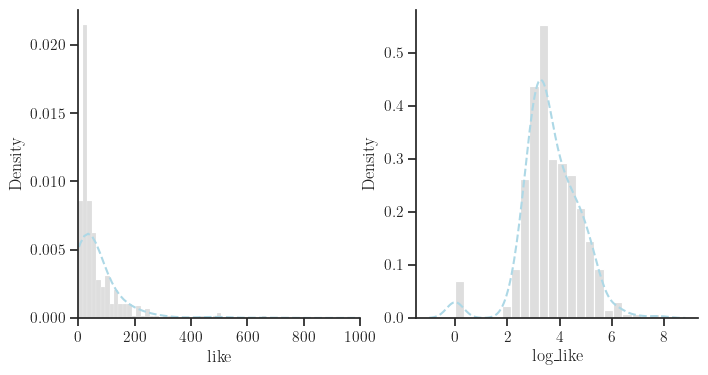

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(df['like'], ax=axes[0], color='lightgrey', stat='density')
axes[0].set_xlim(0, 1000)
sns.kdeplot(df['like'], ax=axes[0], color='lightblue', ls='--')
sns.histplot(df['log_like'], ax=axes[1],color='lightgrey', stat='density')
sns.kdeplot(df['log_like'], ax=axes[1], color='lightblue', ls='--')
plt.savefig('./figures/loglike_like_hist.pdf')

In [7]:
china_map_json = json.loads(requests.get("https://raw.githubusercontent.com/yezongyang/china-geojson/master/china.json").text)
m = folium.Map(
    location=[-59.1759, -11.6016],
    tiles="cartodbpositron",
    zoom_start=2,
)

folium.GeoJson(china_map_json, name="geojson").add_to(m)

folium.LayerControl().add_to(m)

m